In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import cptac
import cptac.utils as ut
# Choose cancer type
cancer_type = "colon"

if cancer_type == "colon":
    cptac.download(dataset="colon", version="latest")
    co = cptac.Colon()
elif cancer_type == "breast":
    cptac.download(dataset="brca", version="latest")
    co = cptac.Brca()
elif cancer_type == "gbm":
    cptac.download(dataset="gbm", version="latest")
    co = cptac.Gbm()
elif cancer_type == "luad":
    cptac.download(dataset="luad", version="latest")
    co = cptac.Luad()
elif cancer_type == "pdac":
    cptac.download(dataset="pdac", version="latest") # Expression
    co = cptac.Pdac()
elif cancer_type == "lscc":
    cptac.download(dataset="lscc", version="latest")
    co = cptac.Lscc()

c:\Users\lazzaralab\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\lazzaralab\anaconda3\lib\site-packages\numpy\.libs\libopenblas.gk7gx5keq4f6uyo3p26ulgbqyhgqo7j4.gfortran-win_amd64.dll
c:\Users\lazzaralab\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
c:\Users\lazzaralab\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


cptac warning: Your version of cptac (1.1.2) is out-of-date. Latest is 1.5.14. Please run 'pip install --upgrade cptac' to update it. (c:\Users\lazzaralab\anaconda3\lib\threading.py, line 870)


In [3]:
cptac.list_datasets()

,Description,Data reuse status,Publication link
Dataset name,,,
Brca,breast cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33212010/
Ccrcc,clear cell renal cell carcinoma (kidney),no restrictions,https://pubmed.ncbi.nlm.nih.gov/31675502/
Colon,colorectal cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/31031003/
Endometrial,endometrial carcinoma (uterine),no restrictions,https://pubmed.ncbi.nlm.nih.gov/32059776/
Gbm,glioblastoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33577785/
Hnscc,head and neck squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/33417831/
Lscc,lung squamous cell carcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/34358469/
Luad,lung adenocarcinoma,no restrictions,https://pubmed.ncbi.nlm.nih.gov/32649874/
Ovarian,high grade serous ovarian cancer,no restrictions,https://pubmed.ncbi.nlm.nih.gov/27372738/


In [4]:
# Load proteomics data 
proteomics = co.get_proteomics('tumor')

samples = proteomics.index
proteins = proteomics.columns
print("Samples:",samples[0:20].tolist()) #the first twenty samples
print("Proteins:",proteins[0:20].tolist()) #the first twenty proteins

Samples: ['01CO005', '01CO006', '01CO008', '01CO013', '01CO014', '01CO015', '01CO019', '01CO022', '05CO002', '05CO003', '05CO006', '05CO011', '05CO015', '05CO020', '05CO026', '05CO028', '05CO029', '05CO032', '05CO033', '05CO034']
Proteins: ['A1BG', 'A1CF', 'A2M', 'AAAS', 'AACS', 'AAGAB', 'AAK1', 'AAMDC', 'AAMP', 'AAR2', 'AARS', 'AARS2', 'AASDHPPT', 'AASS', 'AATF', 'ABAT', 'ABCA8', 'ABCB1', 'ABCB10', 'ABCB6']


In [5]:
proteomics

Name,A1BG,A1CF,A2M,AAAS,AACS,AAGAB,AAK1,AAMDC,AAMP,AAR2,...,ZNHIT6,ZNRD1,ZNRF2,ZPR1,ZRANB2,ZW10,ZWILCH,ZWINT,ZYX,ZZEF1
Patient_ID,,,,,,,,,,,,,,,,,,,,,
01CO005,-1.100,0.3180,-0.4870,0.0995,0.1550,0.1690,0.0653,-0.147,0.1140,0.3410,...,NaN,NaN,0.0384,0.0221,0.2500,0.0869,0.0331,NaN,-0.7330,-0.2650
01CO006,-1.120,-0.4410,-0.3470,-0.0029,0.0957,0.3960,-0.0363,-0.549,0.2200,0.2480,...,NaN,0.324,NaN,-0.3940,0.0846,0.0010,-0.3450,NaN,-0.6580,0.0052
01CO008,-1.200,0.1600,-1.8500,0.1190,-0.0924,0.0187,-0.2140,0.328,-0.2820,-0.3480,...,NaN,NaN,-0.3840,-0.1680,0.3570,-0.3250,0.3490,NaN,-0.8210,0.2000
01CO013,-1.890,0.1120,-0.3290,0.6700,0.1160,0.3130,-0.2380,-0.274,-0.5540,0.2700,...,NaN,NaN,NaN,-0.0656,-0.2950,0.4630,-0.4480,0.0493,-0.9040,-0.1580
01CO014,-0.523,-0.2480,-0.6380,0.2890,0.3780,0.8220,0.0018,-1.080,0.4980,-0.1200,...,0.0322,NaN,0.0467,0.2170,0.2360,0.2870,0.3460,NaN,-0.8120,-0.0273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21CO006,-0.557,-0.4470,0.3420,-0.1390,0.1400,0.0517,0.0039,-0.118,0.1020,0.1750,...,NaN,NaN,NaN,-0.2750,-0.0306,0.0866,NaN,NaN,0.0873,-0.0152
21CO007,-0.975,0.3980,-1.1500,0.5730,-0.1280,0.0600,-0.0559,-1.330,-0.3650,0.2920,...,NaN,NaN,0.2460,0.0047,0.1650,0.1030,NaN,NaN,-0.7520,-0.2410
22CO004,-1.280,0.5180,-0.8720,0.2580,0.4240,0.2980,-0.1500,-0.658,0.0066,-0.0378,...,NaN,NaN,0.4490,-0.0616,0.3850,0.1160,-0.0437,NaN,-0.8840,0.0088


In [6]:
# select only proteins of interest
# EGFR, RAS, RAF1, BRAF, MEK, ERK
prot_int  = proteomics[['EGFR','HRAS','KRAS','NRAS', 'RAF1', 'BRAF','MAP2K1','MAP2K2', 'MAPK1','MAPK3']] #MAPK1: ERK2, MAPK3: ERK1, MAP2K2: MEK2, MAP2K1: MEK1
prot_int

Name,EGFR,HRAS,KRAS,NRAS,RAF1,BRAF,MAP2K1,MAP2K2,MAPK1,MAPK3
Patient_ID,,,,,,,,,,
01CO005,-0.1540,NaN,-0.3600,0.2430,NaN,NaN,-0.1060,0.1090,-0.3720,-0.3320
01CO006,0.0916,NaN,-0.2760,0.0011,NaN,-0.175,-0.3300,-0.2830,0.0902,-0.0163
01CO008,-0.3250,NaN,0.5790,NaN,NaN,NaN,-0.4620,0.2650,-0.2280,0.3660
01CO013,-0.5470,NaN,-0.2170,-0.0732,0.6080,NaN,-0.4890,-0.2750,-0.2450,-0.1930
01CO014,0.0184,NaN,0.2430,NaN,0.0148,NaN,0.3440,0.0185,-0.2540,-0.1920
...,...,...,...,...,...,...,...,...,...,...
21CO006,-0.0624,NaN,-0.0778,-0.0574,NaN,NaN,0.0964,-0.1290,0.0953,0.0938
21CO007,-0.0125,NaN,0.1630,-0.1300,0.6130,NaN,-0.1120,0.2360,-0.0600,-0.1620
22CO004,-0.5250,NaN,-0.0414,NaN,-0.4890,-0.218,-0.2670,0.0409,0.0499,0.0622


In [7]:
# Function to aggregate protein of interest
def aggregate_fnc(dataframe, x_str):
  subset_df        = dataframe.filter(regex=x_str)
  subset_df[x_str] = subset_df.sum(numeric_only=True, axis=1)
  output_df = subset_df[[x_str]]
  return output_df

In [8]:
# Aggregate RAS, RAS, MEK, ERK
EGFR_df = aggregate_fnc(prot_int, 'EGFR')
RAS_df  = aggregate_fnc(prot_int, 'RAS')
RAF_df  = aggregate_fnc(prot_int, 'RAF')
MEK_df  = aggregate_fnc(prot_int, 'MAP2K')
ERK_df  = aggregate_fnc(prot_int, 'MAPK')

MEK_df

Name,MAP2K
Patient_ID,
01CO005,0.0030
01CO006,-0.6130
01CO008,-0.1970
01CO013,-0.7640
01CO014,0.3625
...,...
21CO006,-0.0326
21CO007,0.1240
22CO004,-0.2261


In [9]:
# Create a dataframe that includes EGFR, RAS, RAF, MEK, ERK
from functools import reduce

all_dfs        = [EGFR_df, RAS_df, RAF_df, MEK_df, ERK_df]
df_all_protint = reduce(lambda  left,right: pd.merge(left,right,on=['Patient_ID'],how='left'),all_dfs)
df_all_protint 

Name,EGFR,RAS,RAF,MAP2K,MAPK
Patient_ID,,,,,
01CO005,-0.1540,-0.1170,0.0000,0.0030,-0.7040
01CO006,0.0916,-0.2749,-0.1750,-0.6130,0.0739
01CO008,-0.3250,0.5790,0.0000,-0.1970,0.1380
01CO013,-0.5470,-0.2902,0.6080,-0.7640,-0.4380
01CO014,0.0184,0.2430,0.0148,0.3625,-0.4460
...,...,...,...,...,...
21CO006,-0.0624,-0.1352,0.0000,-0.0326,0.1891
21CO007,-0.0125,0.0330,0.6130,0.1240,-0.2220
22CO004,-0.5250,-0.0414,-0.7070,-0.2261,0.1121


In [10]:
df_all_protint_melt  = df_all_protint.melt(var_name='Name', value_name='vals')

In [11]:
df_all_protint.columns

Index(['EGFR', 'RAS', 'RAF', 'MAP2K', 'MAPK'], dtype='object', name='Name')

In [13]:
# How many of these patient samples have RAF as the lowest abundance protein?
rank_df = df_all_protint.rank(axis=1, method='dense').astype(int)
rank_df

lowest_RAF1_counts = len(rank_df[(rank_df["RAF"]==1)]) 
lowest_EGFR_counts = len(rank_df[(rank_df["EGFR"]==1)]) 
lowest_RAS_counts  = len(rank_df[(rank_df["RAS"]==1)]) 
lowest_ERK_counts  = len(rank_df[(rank_df["MAPK"]==1)]) 
lowest_MEK_counts  = len(rank_df[(rank_df["MAP2K"]==1)]) 

labels = 'RAF', 'EGFR', 'RAS', 'MAPK', 'MAP2K'
sizes = [lowest_RAF1_counts, lowest_EGFR_counts, lowest_RAS_counts, lowest_ERK_counts, lowest_MEK_counts ]

print(lowest_RAF1_counts)
print("CC patients with RAF as the lowest expressing protein")

9
CC patients with RAF as the lowest expressing protein


In [14]:
def Average(lst): 
    return sum(lst) / len(lst) 

In [17]:
# Calculate fold difference between RAF and other proteins (log fold change compared to control)
# Get index of patients with RAF as the lowest exp protein
lowRAF1_patients     = rank_df[(rank_df["RAF"]==1)]
lowRAF1_patients_exp = df_all_protint.loc[lowRAF1_patients.index]
if cancer_type == "pdac":
    print("PDAC")
    transf_exp = lowRAF1_patients_exp
else: 
    transf_exp = 2 ** (lowRAF1_patients_exp)
# Calculate average fold difference
transf_exp.loc['mean']     = transf_exp.mean()
EGFR_folddiff  = (transf_exp.loc['mean','EGFR']/transf_exp.loc['mean','RAF'])
RAS_folddiff   = (transf_exp.loc['mean','RAS']/transf_exp.loc['mean','RAF'])
MEK_folddiff   = (transf_exp.loc['mean','MAP2K']/transf_exp.loc['mean','RAF'])
ERK_folddiff   = (transf_exp.loc['mean','MAPK']/transf_exp.loc['mean','RAF'])
fold_diff_list = [EGFR_folddiff, RAS_folddiff, MEK_folddiff, ERK_folddiff]


In [18]:
lowRAF1_patients_exp

Name,EGFR,RAS,RAF,MAP2K,MAPK
Patient_ID,,,,,
05CO049,-0.122,0.3400,-0.2400,0.1692,-0.1421
05CO050,-0.467,-0.3940,-0.5270,-0.1270,-0.2085
06CO001,-0.419,0.1000,-1.4500,-0.0332,-0.5470
09CO014,-0.722,-0.2240,-1.9500,0.1892,0.5100
11CO051,-0.114,-0.0829,-0.8190,-0.1343,-0.7030
11CO058,0.411,0.0760,0.0079,0.0432,0.0664
15CO001,-0.180,-0.1140,-0.3900,-0.3629,0.8630
22CO004,-0.525,-0.0414,-0.7070,-0.2261,0.1121
27CO004,-0.127,-0.5141,-0.6690,-0.2400,0.0348


In [21]:
lowRAF1_patients_exp

Name,EGFR,RAS,RAF,MAP2K,MAPK
Patient_ID,,,,,
05CO049,-0.122,0.3400,-0.2400,0.1692,-0.1421
05CO050,-0.467,-0.3940,-0.5270,-0.1270,-0.2085
06CO001,-0.419,0.1000,-1.4500,-0.0332,-0.5470
09CO014,-0.722,-0.2240,-1.9500,0.1892,0.5100
11CO051,-0.114,-0.0829,-0.8190,-0.1343,-0.7030
11CO058,0.411,0.0760,0.0079,0.0432,0.0664
15CO001,-0.180,-0.1140,-0.3900,-0.3629,0.8630
22CO004,-0.525,-0.0414,-0.7070,-0.2261,0.1121
27CO004,-0.127,-0.5141,-0.6690,-0.2400,0.0348


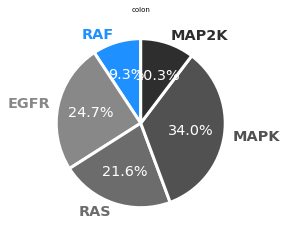

In [27]:
plt.rcParams['pdf.fonttype'] = 42
fig, ax = plt.subplots(figsize=(4, 4))

# Get four different grey colors.
cmap   = plt.get_cmap('Greys')
colors = list(cmap(np.linspace(0.45, 0.85, len(sizes))))
# Swap in a bright blue for the Lacrosse color.
colors[0] = 'dodgerblue'

patches, texts, pcts = ax.pie(
    sizes, labels=labels, autopct='%.1f%%',
    wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'x-large'},
    startangle=90,
    colors=colors,
    # "Explode" the Lacrosse wedge to highlight it.
    explode=(0, 0, 0, 0, 0))

for i, patch in enumerate(patches):
  texts[i].set_color(patch.get_facecolor())
plt.setp(pcts, color='white')
plt.setp(texts, fontweight=600)
ax.set_title(cancer_type, fontsize=7)
plt.tight_layout()
# save pie chart
pie_chart_title2 = cancer_type +'_pie_frac_update_noexplode.pdf'
plt.savefig(pie_chart_title2)